In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('./Financial_Services_mod.csv')

# Replace null values with 0
df.fillna(0, inplace=True)

# Print the data
print(df)

             Date      Symbol Series  Prev Close     Open     High      Low  \
0      2015-01-01        SBIN     EQ      311.85   312.45   315.00   310.70   
1      2015-01-02        SBIN     EQ      314.00   314.35   318.30   314.35   
2      2015-01-05        SBIN     EQ      315.25   316.25   316.80   312.10   
3      2015-01-06        SBIN     EQ      312.75   310.00   311.10   298.70   
4      2015-01-07        SBIN     EQ      299.90   300.00   302.55   295.15   
...           ...         ...    ...         ...      ...      ...      ...   
14089  2021-04-26  BAJFINANCE     EQ     4667.80  4690.00  4829.00  4690.00   
14090  2021-04-27  BAJFINANCE     EQ     4736.55  4747.00  4889.85  4746.55   
14091  2021-04-28  BAJFINANCE     EQ     4865.05  4915.00  5310.00  4915.00   
14092  2021-04-29  BAJFINANCE     EQ     5280.90  5350.00  5525.00  5330.00   
14093  2021-04-30  BAJFINANCE     EQ     5484.85  5350.00  5524.65  5327.70   

         Last    Close     VWAP    Volume      Turn

In [3]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [4]:
def train_model_for_stock(stock_df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_df['Close'].values.reshape(-1,1))

    sequence_length = 60
    X, y = create_sequences(pd.DataFrame(scaled_data), sequence_length)

    # Split data into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20)

    # Calculate RMSE and MSE for training
    trainPredict = model.predict(X_train)
    trainScore_RMSE = sqrt(mean_squared_error(y_train, trainPredict))
    trainScore_MSE = mean_squared_error(y_train, trainPredict)

    # Calculate RMSE and MSE for testing
    testPredict = model.predict(X_test)
    testScore_RMSE = sqrt(mean_squared_error(y_test, testPredict))
    testScore_MSE = mean_squared_error(y_test, testPredict)

    return trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, scaler.inverse_transform(testPredict), y_test, scaler.inverse_transform(y_test)

In [5]:
def plot_predictions(stock_name, true_values, predictions):
    plt.figure(figsize=(14,7))
    plt.plot(true_values, label='Actual Close Price')
    plt.plot(predictions, label='Predicted Close Price', alpha=0.7)
    plt.title(f'{stock_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [7]:
# Create a DataFrame to store the RMSE and MSE values
# Columns: 'Stock', 'Train_RMSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'
performance_df = pd.DataFrame(columns=['Stock', 'Train_RMaSE', 'Train_MSE', 'Test_RMSE', 'Test_MSE'])

Processing SBIN...
Epoch 1/20
38/38 [==============================] - 5s 33ms/step - loss: 0.0222
Epoch 2/20
38/38 [==============================] - 1s 29ms/step - loss: 0.0036
Epoch 3/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0025
Epoch 4/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0023
Epoch 5/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 6/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0020
Epoch 7/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0018
Epoch 8/20
38/38 [==============================] - 1s 29ms/step - loss: 0.0017
Epoch 9/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0016
Epoch 10/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0018
Epoch 11/20
38/38 [==============================] - 1s 30ms/step - loss: 0.0015
Epoch 12/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0015
Epoch 13/20
38/38 

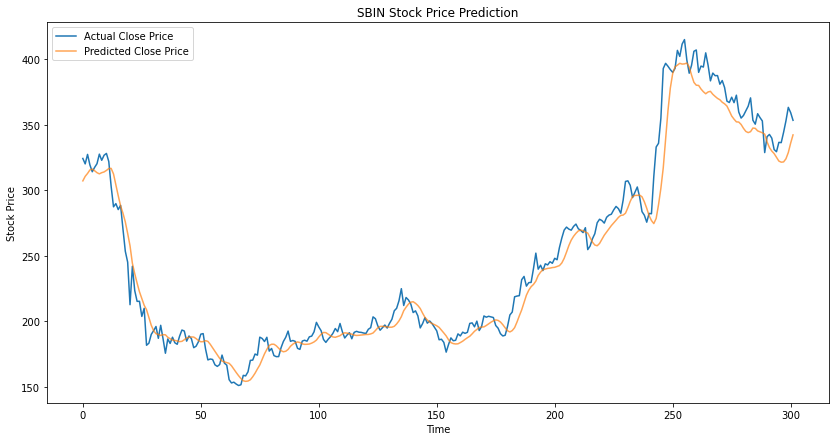

Processing HDFC...
Epoch 1/20
38/38 [==============================] - 4s 31ms/step - loss: 0.0238
Epoch 2/20
38/38 [==============================] - 1s 31ms/step - loss: 0.0011
Epoch 3/20
38/38 [==============================] - 1s 31ms/step - loss: 7.8160e-04
Epoch 4/20
38/38 [==============================] - 1s 31ms/step - loss: 7.9671e-04
Epoch 5/20
38/38 [==============================] - 1s 32ms/step - loss: 7.8434e-04
Epoch 6/20
38/38 [==============================] - 1s 33ms/step - loss: 7.2529e-04
Epoch 7/20
38/38 [==============================] - 1s 32ms/step - loss: 7.1692e-04
Epoch 8/20
38/38 [==============================] - 1s 31ms/step - loss: 7.2123e-04
Epoch 9/20
38/38 [==============================] - 1s 32ms/step - loss: 7.0811e-04
Epoch 10/20
38/38 [==============================] - 1s 32ms/step - loss: 6.8650e-04
Epoch 11/20
38/38 [==============================] - 1s 31ms/step - loss: 6.6956e-04
Epoch 12/20
38/38 [==============================] - 1s 32ms/st

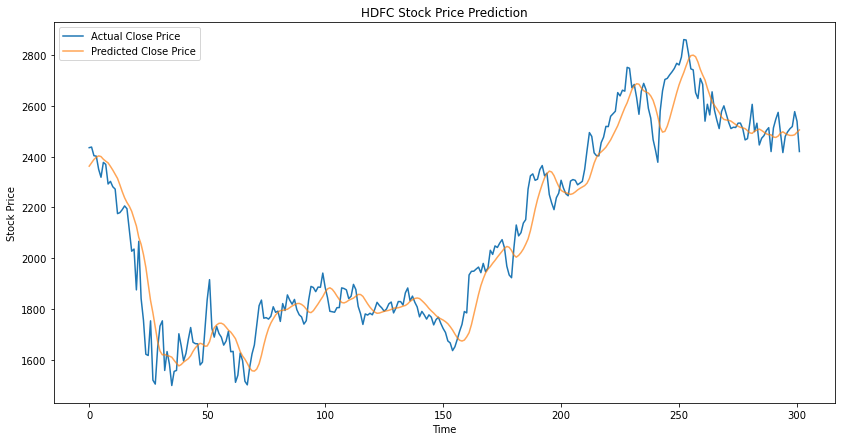

Processing HDFCBANK...
Epoch 1/20
38/38 [==============================] - 4s 34ms/step - loss: 0.0361
Epoch 2/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0028
Epoch 3/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0021
Epoch 4/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0020
Epoch 5/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0019
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0018
Epoch 7/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0018
Epoch 8/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0018
Epoch 9/20
38/38 [==============================] - 2s 47ms/step - loss: 0.0016
Epoch 10/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0015
Epoch 11/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0015
Epoch 12/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0013
Epoch 13/20
38

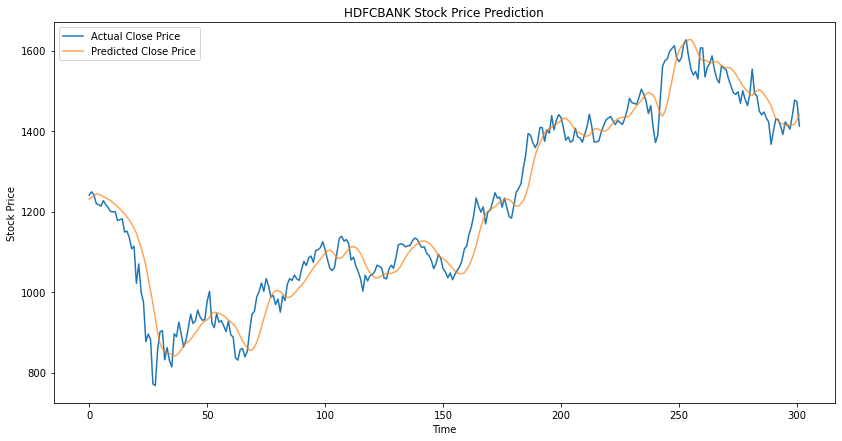

Processing ICICIBANK...
Epoch 1/20
38/38 [==============================] - 4s 31ms/step - loss: 0.0215
Epoch 2/20
38/38 [==============================] - 1s 34ms/step - loss: 9.3261e-04
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 7.3422e-04
Epoch 4/20
38/38 [==============================] - 1s 32ms/step - loss: 7.0071e-04
Epoch 5/20
38/38 [==============================] - 1s 34ms/step - loss: 6.9657e-04
Epoch 6/20
38/38 [==============================] - 1s 33ms/step - loss: 6.7476e-04
Epoch 7/20
38/38 [==============================] - 1s 33ms/step - loss: 6.4814e-04
Epoch 8/20
38/38 [==============================] - 1s 35ms/step - loss: 5.9645e-04
Epoch 9/20
38/38 [==============================] - 1s 33ms/step - loss: 5.6768e-04
Epoch 10/20
38/38 [==============================] - 1s 35ms/step - loss: 5.5797e-04
Epoch 11/20
38/38 [==============================] - 1s 34ms/step - loss: 5.4641e-04
Epoch 12/20
38/38 [==============================] - 1

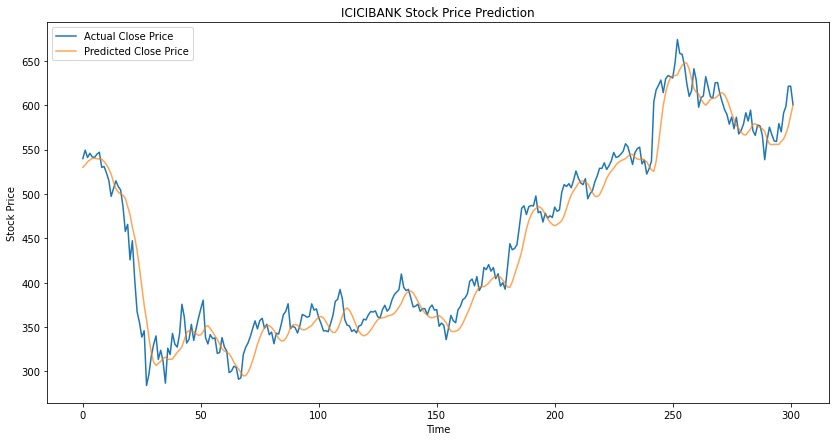

Processing INDUSINDBK...
Epoch 1/20
38/38 [==============================] - 4s 36ms/step - loss: 0.0631
Epoch 2/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0031
Epoch 3/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0014
Epoch 4/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0010
Epoch 5/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 6/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 7/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0010
Epoch 8/20
38/38 [==============================] - 1s 37ms/step - loss: 9.8595e-04
Epoch 9/20
38/38 [==============================] - 1s 35ms/step - loss: 9.6048e-04
Epoch 10/20
38/38 [==============================] - 1s 36ms/step - loss: 9.9842e-04
Epoch 11/20
38/38 [==============================] - 1s 36ms/step - loss: 8.9899e-04
Epoch 12/20
38/38 [==============================] - 1s 35ms/step - loss: 9.1

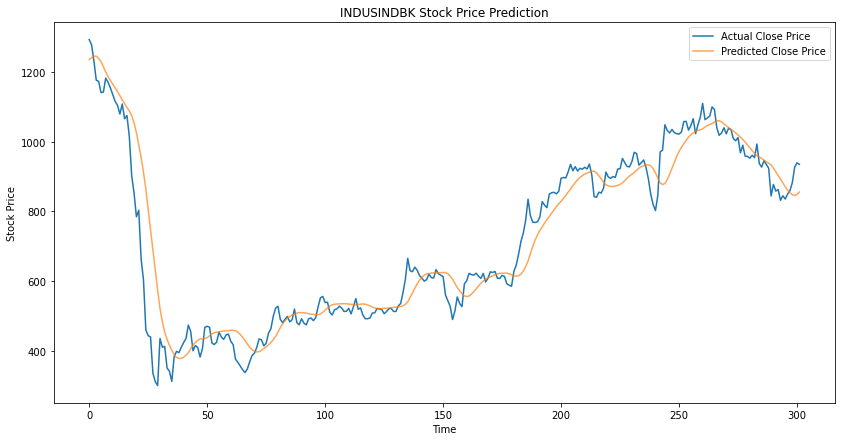

Processing KOTAKBANK...
Epoch 1/20
38/38 [==============================] - 4s 34ms/step - loss: 0.0111
Epoch 2/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0017
Epoch 4/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0016
Epoch 5/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0015
Epoch 6/20
38/38 [==============================] - 1s 36ms/step - loss: 0.0016
Epoch 7/20
38/38 [==============================] - 2s 41ms/step - loss: 0.0013
Epoch 8/20
38/38 [==============================] - 2s 43ms/step - loss: 0.0013
Epoch 9/20
38/38 [==============================] - 2s 42ms/step - loss: 0.0012
Epoch 10/20
38/38 [==============================] - 1s 37ms/step - loss: 0.0011
Epoch 11/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0011
Epoch 12/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0013
Epoch 13/20
3

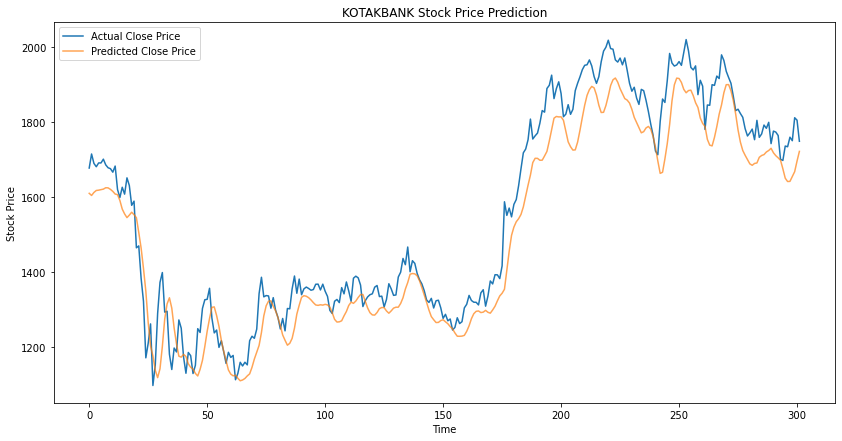

Processing AXISBANK...
Epoch 1/20
38/38 [==============================] - 4s 34ms/step - loss: 0.0505
Epoch 2/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0032
Epoch 3/20
38/38 [==============================] - 1s 32ms/step - loss: 0.0018
Epoch 4/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0018
Epoch 5/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0017
Epoch 6/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0017
Epoch 7/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0016
Epoch 8/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0015
Epoch 9/20
38/38 [==============================] - 1s 34ms/step - loss: 0.0015
Epoch 10/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0016
Epoch 11/20
38/38 [==============================] - 1s 33ms/step - loss: 0.0014
Epoch 12/20
38/38 [==============================] - 1s 35ms/step - loss: 0.0014
Epoch 13/20
38

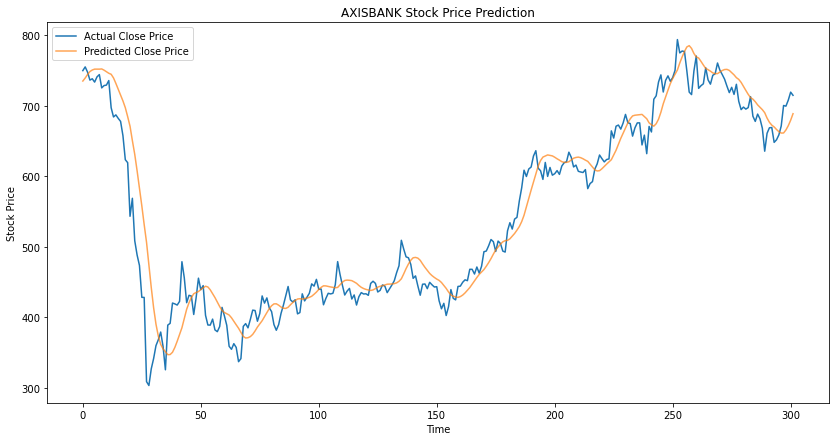

Processing BAJAJFINSV...
Epoch 1/20
38/38 [==============================] - 4s 35ms/step - loss: 0.0170
Epoch 2/20
38/38 [==============================] - 1s 35ms/step - loss: 5.6936e-04
Epoch 3/20
38/38 [==============================] - 1s 34ms/step - loss: 4.9129e-04
Epoch 4/20
38/38 [==============================] - 1s 35ms/step - loss: 4.8999e-04
Epoch 5/20
38/38 [==============================] - 1s 36ms/step - loss: 4.7343e-04
Epoch 6/20
38/38 [==============================] - 2s 44ms/step - loss: 5.0480e-04
Epoch 7/20
38/38 [==============================] - 1s 39ms/step - loss: 4.7289e-04
Epoch 8/20
38/38 [==============================] - 2s 39ms/step - loss: 4.6797e-04
Epoch 9/20
38/38 [==============================] - 1s 39ms/step - loss: 4.6503e-04
Epoch 10/20
38/38 [==============================] - 1s 38ms/step - loss: 4.2254e-04
Epoch 11/20
38/38 [==============================] - 1s 37ms/step - loss: 5.3485e-04
Epoch 12/20
38/38 [==============================] - 

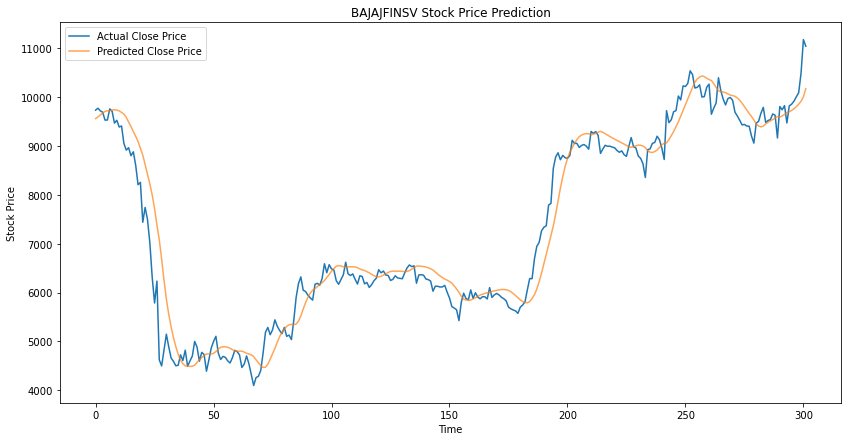

Processing BAJFINANCE...
Epoch 1/20
38/38 [==============================] - 5s 48ms/step - loss: 0.0127
Epoch 2/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0040
Epoch 3/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0030
Epoch 4/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0031
Epoch 5/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0030
Epoch 6/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0024
Epoch 7/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0024
Epoch 8/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0022
Epoch 9/20
38/38 [==============================] - 2s 39ms/step - loss: 0.0022
Epoch 10/20
38/38 [==============================] - 1s 39ms/step - loss: 0.0019
Epoch 11/20
38/38 [==============================] - 2s 40ms/step - loss: 0.0021
Epoch 12/20
38/38 [==============================] - 1s 38ms/step - loss: 0.0018
Epoch 13/20


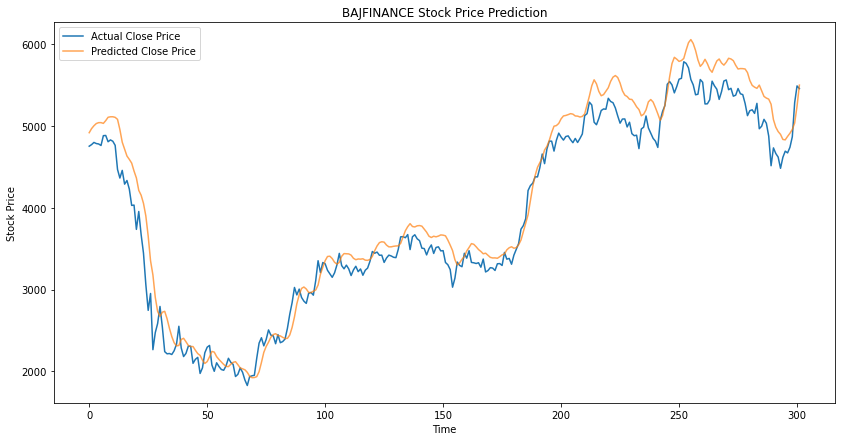

In [8]:
unique_stocks = df['Symbol'].unique()

# Initialize an empty list to store performance metrics for each stock
performance_list = []

for stock in unique_stocks:
    stock_df = df[df['Symbol'] == stock]
    if len(stock_df) > 2 * 60:  # Ensure there's enough data
        print(f"Processing {stock}...")
        trainScore_RMSE, trainScore_MSE, testScore_RMSE, testScore_MSE, predictions, y_test, true_values = train_model_for_stock(stock_df)
        plot_predictions(stock, true_values, predictions)
        
        # Create a dictionary with the performance metrics
        current_stock_performance = {
            'Stock': stock,  # Replace with the actual stock name
            'Train_RMSE': trainScore_RMSE,
            'Train_MSE': trainScore_MSE,
            'Test_RMSE': testScore_RMSE,
            'Test_MSE': testScore_MSE
        }
        
        # Append the dictionary to the list
        performance_list.append(current_stock_performance)

# Create a DataFrame from the list of dictionaries
performance_df = pd.DataFrame(performance_list)

# Now 'performance_df' contains the RMSE and MSE values for all stocks

In [9]:
performance_df

,Stock,Train_RMSE,Train_MSE,Test_RMSE,Test_MSE
0,SBIN,0.037904,0.001437,0.051712,0.002674
1,HDFC,0.022519,0.000507,0.048785,0.002380
2,HDFCBANK,0.031505,0.000993,0.028299,0.000801
3,ICICIBANK,0.022621,0.000512,0.042714,0.001824
4,INDUSINDBK,0.031615,0.001000,0.043990,0.001935
5,KOTAKBANK,0.033293,0.001108,0.057305,0.003284
6,AXISBANK,0.035316,0.001247,0.069047,0.004767
7,BAJAJFINSV,0.018299,0.000335,0.045219,0.002045
8,BAJFINANCE,0.034969,0.001223,0.025358,0.000643
